## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [74]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [75]:
# created two data frames, df and dftest. I used dftest as my working version, which i eventually assigned to df2
df = pd.read_csv('ab_data.csv')
dftest = pd.read_csv('ab_data_2.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [76]:
#no of rows and columns
df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [77]:
#no of  unique users
df.nunique()

user_id         290584
timestamp       294478
group                2
landing_page         2
converted            2
dtype: int64

d. The proportion of users converted.

In [78]:
#total number of converted users
no_convereted_users = df.query('converted == 1').user_id.nunique() / df.user_id.nunique()



In [79]:
#total number of converted users
no_convereted_users

0.12104245244060237

e. The number of times the `new_page` and `treatment` don't line up.

In [80]:
# compute number of times they dont line up
df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) == False].shape[0]

#this occurs 3893 times


3893

In [81]:
df_no_align = df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) == False].shape[0]


In [82]:
df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) == False].shape[0]

3893

In [83]:
df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) == False].head()


,user_id,timestamp,group,landing_page,converted
22,767017,2017-01-12 22:58:14.991443,control,new_page,0
240,733976,2017-01-11 15:11:16.407599,control,new_page,0
308,857184,2017-01-20 07:34:59.832626,treatment,old_page,0
327,686623,2017-01-09 14:26:40.734775,treatment,old_page,0
357,856078,2017-01-12 12:29:30.354835,treatment,old_page,0


In [84]:
df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) == False].isnull()

,user_id,timestamp,group,landing_page,converted
22,False,False,False,False,False
240,False,False,False,False,False
308,False,False,False,False,False
327,False,False,False,False,False
357,False,False,False,False,False
490,False,False,False,False,False
685,False,False,False,False,False
713,False,False,False,False,False
776,False,False,False,False,False
846,False,False,False,False,False


In [85]:
#compute rows with missing values
df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) == False].isnull()

,user_id,timestamp,group,landing_page,converted
22,False,False,False,False,False
240,False,False,False,False,False
308,False,False,False,False,False
327,False,False,False,False,False
357,False,False,False,False,False
490,False,False,False,False,False
685,False,False,False,False,False
713,False,False,False,False,False
776,False,False,False,False,False
846,False,False,False,False,False


f. Do any of the rows have missing values?


There are no rows with missing values based on the above table

In [86]:
#show rows that are not align, i.e. control with old_page and treatment with new_page

dftest[((dftest['group'] == 'treatment') == (dftest['landing_page'] == 'old_page')) == True]

,user_id,timestamp,group,landing_page,converted
22,767017,2017-01-12 22:58:14.991443,control,new_page,0
240,733976,2017-01-11 15:11:16.407599,control,new_page,0
308,857184,2017-01-20 07:34:59.832626,treatment,old_page,0
327,686623,2017-01-09 14:26:40.734775,treatment,old_page,0
357,856078,2017-01-12 12:29:30.354835,treatment,old_page,0
490,808613,2017-01-10 21:44:01.292755,control,new_page,0
685,666385,2017-01-23 08:11:54.823806,treatment,old_page,0
713,748761,2017-01-10 15:47:44.445196,treatment,old_page,0
776,820951,2017-01-04 02:42:54.770627,treatment,old_page,0
846,637639,2017-01-11 23:09:52.682329,control,new_page,1


In [87]:
# drop the rows that are not aligned
delete_rows = dftest[((dftest['group'] == 'treatment') == (dftest['landing_page'] == 'old_page')) == True].index

In [88]:
dftest.drop(delete_rows , inplace=True)

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [89]:
#initialise the df2 dataframe

df2 = dftest[((dftest['group'] == 'treatment') == (dftest['landing_page'] == 'old_page')) == False]

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [90]:
# shows the number of unique users 
df2.user_id.nunique()

290584

In [91]:
dftest[((dftest['group'] == 'treatment') == (dftest['landing_page'] == 'old_page')) == False]


,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
7,719014,2017-01-17 01:48:29.539573,control,old_page,0
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


In [92]:
# look for duplicates in the user_id column
user_id = df2["user_id"]

In [93]:
dftest[user_id.isin(user_id[user_id.duplicated()])]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [94]:
dftest[user_id.isin(user_id[user_id.duplicated()])]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


b. There is one **user_id** repeated in **df2**.  What is it?

773192

c. What is the row information for the repeat **user_id**? 

In [95]:
dftest[user_id.isin(user_id[user_id.duplicated()])]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [96]:
#drop the duplicate user_id 
df2.sort_values("user_id", inplace = True) 

In [97]:
#drop the duplicate user_id value
df2.drop_duplicates(subset ="user_id", 
                     keep = False, inplace = True) 

In [98]:
df2

,user_id,timestamp,group,landing_page,converted
63114,630000,2017-01-19 06:26:06.548941,treatment,new_page,0
103873,630001,2017-01-16 03:16:42.560309,treatment,new_page,1
205236,630002,2017-01-19 19:20:56.438330,control,old_page,0
247344,630003,2017-01-12 10:09:31.510471,treatment,new_page,0
242283,630004,2017-01-18 20:23:58.824994,treatment,new_page,0
77834,630005,2017-01-17 21:22:25.940766,treatment,new_page,1
241631,630006,2017-01-14 05:13:51.962356,treatment,new_page,0
159053,630008,2017-01-11 16:11:11.131461,control,old_page,0
196137,630009,2017-01-05 23:35:15.820565,control,old_page,1
247783,630010,2017-01-06 16:36:05.678507,treatment,new_page,0


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [99]:
df2.head()

,user_id,timestamp,group,landing_page,converted
63114,630000,2017-01-19 06:26:06.548941,treatment,new_page,0
103873,630001,2017-01-16 03:16:42.560309,treatment,new_page,1
205236,630002,2017-01-19 19:20:56.438330,control,old_page,0
247344,630003,2017-01-12 10:09:31.510471,treatment,new_page,0
242283,630004,2017-01-18 20:23:58.824994,treatment,new_page,0


b. Given that an individual was in the `control` group, what is the probability they converted?

In [100]:
df2.group.value_counts()

treatment    145309
control      145274
Name: group, dtype: int64

In [101]:
df2.converted.value_counts()

0    255830
1     34753
Name: converted, dtype: int64

In [102]:
df2.query('converted == "1"').user_id.nunique() / df2.query('converted == "0"').user_id.nunique()

0.13584411523277176

In [103]:
# data frame for control
df_control = df2.query('group == "control"')

In [104]:
# Given that an individual was in the control group, what is the probability they converted
df_control.query('converted == "1"').user_id.nunique() / df_control.query('converted == "0"').user_id.nunique()



0.13686269906483547

In [187]:
# Given an individual received the control page, the probability of converting.
prob_control = df_control.query('converted == "1"').user_id.nunique() / df_control.user_id.nunique()
print(prob_control)

0.1203863045004612


In [105]:
# control group completion rate
control_conversion_rate = df_control.query('converted == "1"').user_id.nunique() / df_control.query('converted == "0"').user_id.nunique()

In [189]:
#p_old = control_conversion_rate
p_old = prob_control

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [107]:
# data frame for treatment
df_treatment = df2.query('group == "treatment"')

In [108]:
# Given that an individual was in the treatment group, what is the probability they converted?
df_treatment.query('converted == "1"').user_id.nunique() / df_treatment.query('converted == "0"').user_id.nunique()

0.13482759967199032

In [109]:
# experiment group completion rate
experiment_conversion_rate = df_treatment.query('converted == "1"').user_id.nunique() / df_treatment.query('converted == "0"').user_id.nunique()

In [188]:
# Given that an individual received the treatment, the probability of converting
prob_experiment = experiment_conversion_rate = df_treatment.query('converted == "1"').user_id.nunique() / df_treatment.user_id.nunique()
print(prob_experiment)

0.11880888313869065


In [190]:
#p_new = experiment_conversion_rate
p_new = prob_experiment

In [196]:
# actual difference observed in ab_data.csv
print(p_new - p_old)

p_diff_for_actual_ad_data = (p_new - p_old)

-0.0015774213617705535


d. What is the probability that an individual received the new page?

In [197]:
#data frame for receiving new  page
df2.landing_page.value_counts()

new_page    145309
old_page    145274
Name: landing_page, dtype: int64

In [198]:
#probability that an individual received the new page
df2.query('landing_page == "new_page"').user_id.nunique() / df2.landing_page.shape[0]

0.5000602237570677

In [195]:
#probability of converting regardless of page

prob_converting_regardless = (df_treatment.query('converted == "1"').user_id.nunique() + df_control.query('converted == "1"').user_id.nunique()) / df2.converted.shape[0]

print(prob_converting_regardless)

0.11959749882133504


e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

There is not sufficient evidence to show that the new treatment page leads to more  conversions. The conversion rate from the control group of 13.7% is slightly higher than that of the treatment group of 13.4% given that there is a 50.3% chance  of landing on the new_page
There is not therefore sufficient evidence to show that the new treatment page leads to more conversions

**Your answer goes here.**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

$$H_0: P_{new} - P_{old} <= 0$$


$$H_1: P_{new} > 0$$

**Put your answer here.**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

In [199]:
# Create sampling distribution for difference in completion rates
# with boostrapping
control, experiment, diffs = [], [], []
size = df2.shape[0]
for _ in range(10000):
    b_samp = df2.sample(size, replace=True)
    control_df = b_samp.query('group == "control"')
    experiment_df = b_samp.query('group == "treatment"')
    control_ctr = control_df.query('converted == "1"').user_id.nunique() / control_df.user_id.nunique()
    experiment_ctr = experiment_df.query('converted == "1"').user_id.nunique() / experiment_df.user_id.nunique()
    control.append(control_ctr)
    experiment.append(experiment_ctr )
    diffs.append(experiment_ctr - control_ctr)

In [302]:
print(df2.query('converted == "1"').user_id.nunique() / df2.converted.shape[0])

0.11959749882133504


a. What is the **convert rate** for $p_{new}$ under the null? 

In [309]:
#p_new under the null
print(df2.query('converted == "1"').user_id.nunique() / df2.converted.shape[0])

0.11959749882133504


b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [305]:
#p_old under the null
print(df2.query('converted == "1"').user_id.nunique() / df2.converted.shape[0])

0.11959749882133504


In [119]:
#data frame for receiving new  page
df2.landing_page.value_counts()

new_page    145309
old_page    145274
Name: landing_page, dtype: int64

c. What is $n_{new}$?

In [120]:
n_new = 145309

d. What is $n_{old}$?

In [121]:
n_old = 145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [122]:
#new_page_converted = np.random.binomial(n = n_new, p = experiment_conversion_rate)

#p_new = new_page_converted/n_new

In [310]:
#df2.query('converted == "1"').user_id.nunique() / df2.converted.shape[0]

new_page_converted = np.random.binomial(n = n_new, p = df2.query('converted == "1"').user_id.nunique() / df2.converted.shape[0])

p_new = new_page_converted/n_new


In [311]:
#df2.query('converted == "1"').user_id.nunique() / df2.converted.shape[0]
print(p_new)



0.12032289809991123


In [312]:
# size of new_page_converted
new_page_converted_no = np.random.choice([0,1],n_new, p=(p_new,1-p_new))

In [313]:
new_page_converted_no.shape[0]

145309

In [314]:
print(p_new)

0.12032289809991123


f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [124]:
#old_page_converted = np.random.binomial(n = n_old, p = control_conversion_rate)

#p_old = old_page_converted/n_old

In [315]:
old_page_converted = np.random.binomial(n = n_old, p = df2.query('converted == "1"').user_id.nunique() / df2.converted.shape[0])

p_old = old_page_converted/n_old

In [316]:
# size of new_page_converted
old_page_converted_no = np.random.choice([0,1],n_old, p=(p_old,1-p_old))

In [317]:
old_page_converted_no.shape[0]

145274

In [318]:
print(p_old)

0.12068918044522764


g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [319]:
print(p_new - p_old)

-0.0003662823453164099


In [128]:
size = df2.shape[0]
print(size)

290583


h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [320]:
# Create sampling distribution for difference in completion rates
# with boostrapping
diffs = []
size = df2.shape[0]
for _ in range(10000):
   # b_samp = df2.sample(size, replace=True)
    old_page_converted = np.random.binomial(n = n_old, p = df2.query('converted == "1"').user_id.nunique() / df2.converted.shape[0])
    p_old = old_page_converted/n_old
    new_page_converted = np.random.binomial(n = n_new, p = df2.query('converted == "1"').user_id.nunique() / df2.converted.shape[0])
    p_new = new_page_converted/n_new
    p_diff = p_new - p_old
    diffs.append(p_diff)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

In [333]:
# convert to numpy array
p_diffs = np.array(diffs)

# compute the average conversion rate
print(p_diffs.mean())

-1.9430798005358864e-05


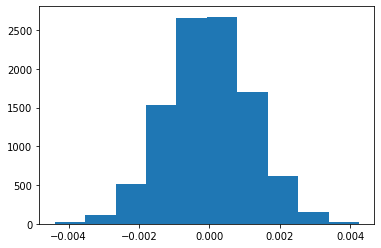

In [334]:
# plot distribution
plt.hist(p_diffs);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [335]:
# p_diffs under the null
null_vals = np.random.normal(0, np.std(p_diffs), 10000)


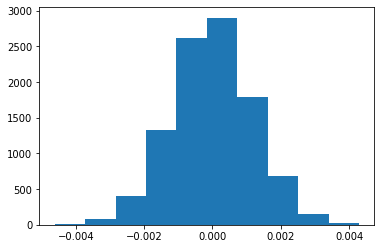

In [336]:
# Plot the null distribution
plt.hist(null_vals);

In [373]:
# proportion of the p_diffs are greater than the actual difference observed in ab_data.csv
(null_vals > p_diff_for_actual_ad_data).mean()

0.9072

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

we just computed the p-value will tells us whether to accept the null hypothesis and reject the alternate hypothesis or reject the null hypothesis and accept the alternate hypothesis. These two altenate actions will help  us answer the questions as  to whether there is a difference between the old and new pages

The above p-value being closer to 1 (one) means we accept the null hypothesis and reject the alternate hypothesis. This simply means that the old pages still performs better interms of conversion rates than the old pages

**Put your answer here.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [167]:
import statsmodels.api as sm


convert_old = 14274
convert_new = 14309
n_old = 145274
n_new = 145309

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [168]:
z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative='larger') 

In [169]:
print(p_value)

0.42207981956420343


In [170]:
print(z_score)

0.19657563485994367


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

For part l, the p-value and z_score tells us to accept the null hypothesis and reject the alternate hypothesis as the p-value is greater than 0.05 

for Part j. and k., the statistic falls within the simulated sampling distribution. This also means that the conversion rates for the old pages are still better than those of the new pages and therefore we accept the null hypothesis and reject the alternate hypothesis. 

From the above, i agree with the findings as both readings indicate that the old pages have higher conversion rates that the new pages

**Put your answer here.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Put your answer here.**

I would use a logistic regression as the outcomes are either 1 or zero

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [340]:
df2.head()

,user_id,timestamp,group,landing_page,converted
63114,630000,2017-01-19 06:26:06.548941,treatment,new_page,0
103873,630001,2017-01-16 03:16:42.560309,treatment,new_page,1
205236,630002,2017-01-19 19:20:56.438330,control,old_page,0
247344,630003,2017-01-12 10:09:31.510471,treatment,new_page,0
242283,630004,2017-01-18 20:23:58.824994,treatment,new_page,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [349]:
df2[['old_page', 'new_page']] = pd.get_dummies(df2['group'])
df2.head()

,user_id,timestamp,group,landing_page,converted,new_page,old_page,intercept
63114,630000,2017-01-19 06:26:06.548941,treatment,new_page,0,1,0,1
103873,630001,2017-01-16 03:16:42.560309,treatment,new_page,1,1,0,1
205236,630002,2017-01-19 19:20:56.438330,control,old_page,0,0,1,1
247344,630003,2017-01-12 10:09:31.510471,treatment,new_page,0,1,0,1
242283,630004,2017-01-18 20:23:58.824994,treatment,new_page,0,1,0,1


In [350]:
df2['intercept'] = 1

logit_mod = sm.Logit(df2['converted'], df2[['intercept','new_page']])
results = logit_mod.fit()


Optimization terminated successfully.
         Current function value: 0.366119
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [351]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290583
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            1
Date:                Fri, 09 Aug 2019   Pseudo R-squ.:               8.068e-06
Time:                        12:37:05   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1901
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
new_page      -0.0150      0.011     -1.310      0.190      -0.037       0.007
==============================================================================
"""

In [354]:
np.exp(results.params)


intercept    0.136863
new_page     0.985130
dtype: float64

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

The p-value is 0.190. It differs because we were using the old_page as the baseline

**Put your answer here.**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Put your answer here.**

Adding other factors to the model improves improves the model by making better predictions for the dependant variable. The disadvantages of adding additional terms may be the added risk of Mulitple collinearity, which affects the coefficient values 

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [355]:
countries_df = pd.read_csv('countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [356]:
df_new.head()

,country,timestamp,group,landing_page,converted,new_page,old_page,intercept
user_id,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1


In [360]:
### Create the necessary dummy variables
df_new[['UK', 'US' ,'CA']] = pd.get_dummies(df_new['country'])
df_new.head()

,country,timestamp,group,landing_page,converted,new_page,old_page,intercept,UK,US,CA
user_id,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1,1,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1,1,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1,0,1,0


In [362]:
df_new['intercept'] = 1

logit_mod = sm.Logit(df_new['converted'], df_new[['intercept','UK','US']])
results = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366117
         Iterations 6


In [363]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290583
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            2
Date:                Fri, 09 Aug 2019   Pseudo R-squ.:               1.520e-05
Time:                        12:53:55   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9967      0.007   -292.314      0.000      -2.010      -1.983
UK            -0.0408      0.027     -1.518      0.129      -0.093       0.012
US             0.0099      0.013      0.745      0.456      -0.016       0.036
==============================================================================
"""

In [364]:
np.exp(results.params)

intercept    0.135779
UK           0.960013
US           1.009960
dtype: float64

Yes, it appears that countries have an influence on conversion, e.g. 1.009960 times likely  in US (holding all else constant), UK , 0.960013 times likely, holding all else constant

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [365]:
df_new['intercept'] = 1

logit_mod = sm.Logit(df_new['converted'], df_new[['intercept','UK','US','new_page']])
results = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366114
         Iterations 6


In [367]:
### Fit Your Linear Model And Obtain the Results
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290583
Model:                          Logit   Df Residuals:                   290579
Method:                           MLE   Df Model:                            3
Date:                Fri, 09 Aug 2019   Pseudo R-squ.:               2.322e-05
Time:                        13:08:39   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1761
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
UK            -0.0408      0.027     -1.516      0.129      -0.093       0.012
US             0.0099      0.013      0.743      0.458      -0.016       0.036
new_page      -0.0149      0.011     -1.306      0.191      -0.037       0.007
==============================================================================
"""

In [368]:
np.exp(results.params)

intercept    0.136795
UK           0.960057
US           1.009927
new_page     0.985175
dtype: float64

In [378]:
np.exp(-0.0408),np.exp(0.0099),np.exp(-0.0149)

(0.9600211149716509, 1.0099491671175422, 0.9852104557227469)

0.9600 times likely  in US (holding all else constant), UK , 0.960013 times likely, holding all else constant

In [375]:
# exponetial value for UK coeffient
1/np.exp(-0.0408)

1.0416437559600236

In [379]:
# exponetial value for new_page coeffient
1/np.exp(-0.0149)

1.0150115583846535

In [ ]:
## interpretation of coeffients
For the UK, there is a 1.0416 decrease in conversion rates compared to canada, holding all factors constant.

For the US, there is a 1.0099 increase in conversion rates compared to canada, holding all factors constant.

There is a 1.0150 decrease in conversion rates for a 1 unit increase in the new_page viewers

In [374]:
1/np.exp(-0.0149)

1.0150115583846535

<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! 

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.